<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
# Creating the dataset by concatenating X and y
boston = pd.concat([y, X], axis=1)
boston.head(5)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Print data shape
boston.shape

(506, 14)

In [5]:
#Print data types
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
#Count of null values by column
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
#Basic Stats
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
boston.loc[:,:].nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

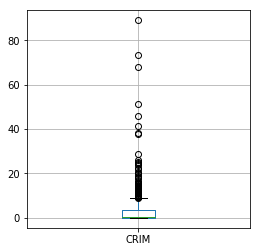

In [29]:
ax = boston.boxplot(column = 'CRIM', figsize = (4,4));

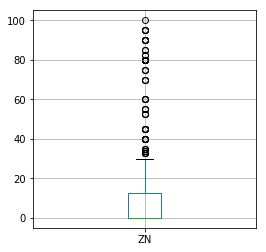

In [30]:
ax = boston.boxplot(column = 'ZN', figsize = (4,4));

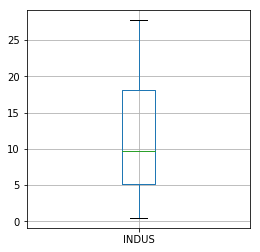

In [31]:
ax = boston.boxplot(column = 'INDUS', figsize = (4,4));

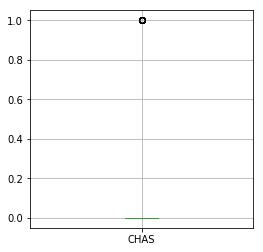

In [32]:
ax = boston.boxplot(column = 'CHAS', figsize = (4,4));

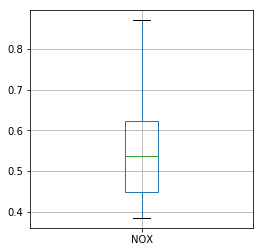

In [33]:
ax = boston.boxplot(column = 'NOX', figsize = (4,4));

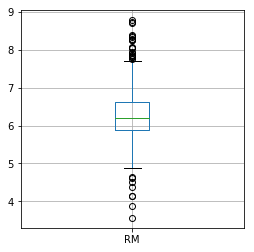

In [34]:
ax = boston.boxplot(column = 'RM', figsize = (4,4));

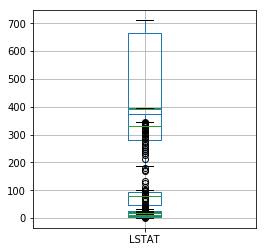

In [35]:
#Similar logic for boxplots pertaining to other variables
ax = boston.boxplot(column = 'AGE', figsize = (4,4));
ax = boston.boxplot(column = 'DIS', figsize = (4,4));
ax = boston.boxplot(column = 'RAD', figsize = (4,4));
ax = boston.boxplot(column = 'TAX', figsize = (4,4));
ax = boston.boxplot(column = 'PTRATIO', figsize = (4,4));
ax = boston.boxplot(column = 'B', figsize = (4,4));
ax = boston.boxplot(column = 'LSTAT', figsize = (4,4));

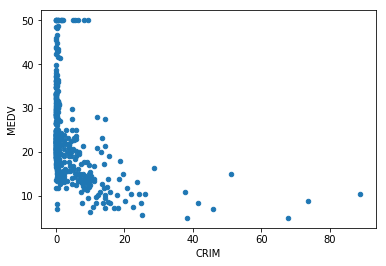

In [9]:
#Inspecting scatter plots for all independent variables w.r.t. median income.
ax = boston.plot(kind='scatter', x = 'CRIM', y = 'MEDV')

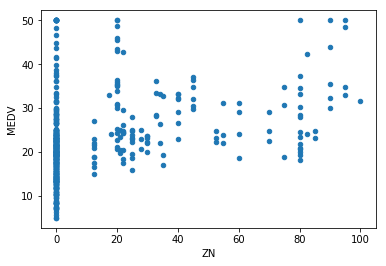

In [10]:
ax = boston.plot(kind='scatter', x = 'ZN', y = 'MEDV')

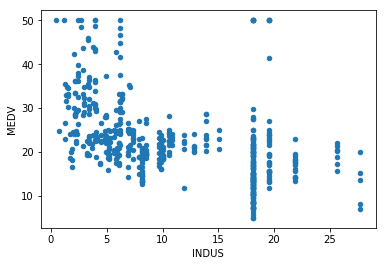

In [11]:
ax = boston.plot(kind='scatter', x = 'INDUS', y = 'MEDV')

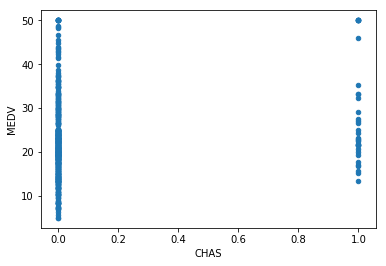

In [12]:
ax = boston.plot(kind='scatter', x = 'CHAS', y = 'MEDV')

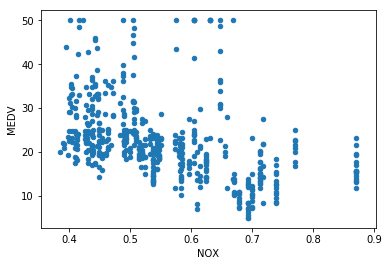

In [13]:
ax = boston.plot(kind='scatter', x = 'NOX', y = 'MEDV')

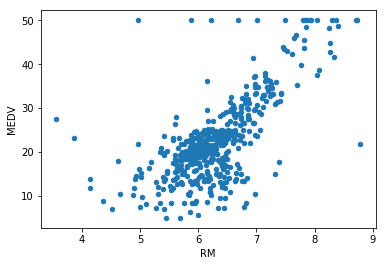

In [14]:
ax = boston.plot(kind='scatter', x = 'RM', y = 'MEDV')

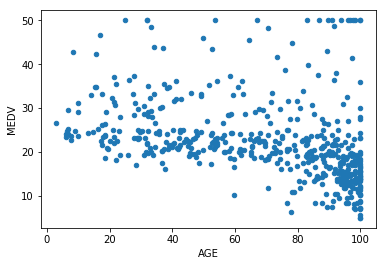

In [15]:
ax = boston.plot(kind='scatter', x = 'AGE', y = 'MEDV')

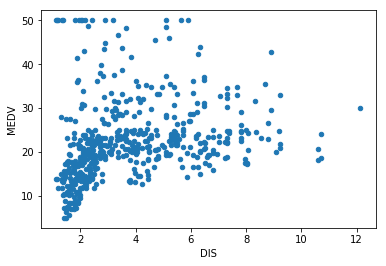

In [16]:
ax = boston.plot(kind='scatter', x = 'DIS', y = 'MEDV')

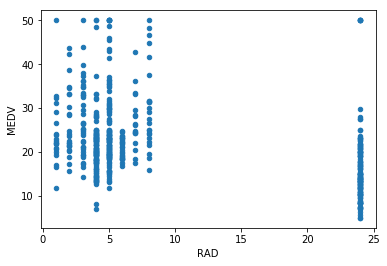

In [17]:
ax = boston.plot(kind='scatter', x = 'RAD', y = 'MEDV')

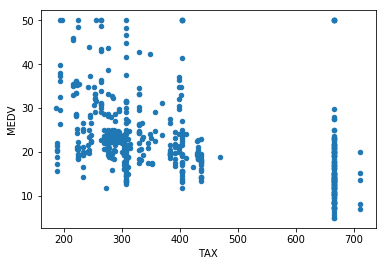

In [18]:
ax = boston.plot(kind='scatter', x = 'TAX', y = 'MEDV')

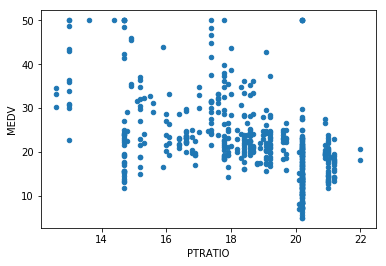

In [19]:
ax = boston.plot(kind='scatter', x = 'PTRATIO', y = 'MEDV')

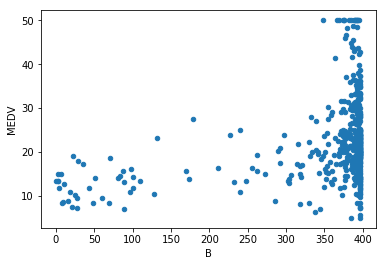

In [20]:
ax = boston.plot(kind='scatter', x = 'B', y = 'MEDV')

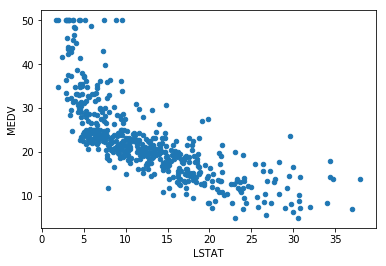

In [21]:
ax = boston.plot(kind='scatter', x = 'LSTAT', y = 'MEDV')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [36]:
feature_cols = boston.columns.drop(['MEDV'])
X = boston.loc[:, feature_cols]
y = boston.loc[:, 'MEDV']
y_null = np.zeros(len(y))+np.mean(y)

from sklearn import metrics


In [37]:
print(metrics.mean_squared_error(y,y_null))

84.41955615616554


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

lr = LinearRegression()
lr.fit(X, y)

print(metrics.mean_squared_error(y_train,lr.predict(X_train)))
print(metrics.mean_squared_error(y_test,lr.predict(X_test)))

22.893543268008383
18.926168390351947


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [39]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)
list(kf.split(X, y))

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,
          28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  56,
          57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  71,  72,
          73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  98,  99,
         100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113,
         114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
         127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140,
         141, 142, 143, 144, 148, 149, 150, 151, 152, 153, 154, 156, 157,
         158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
         171, 172, 173, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185,
         186, 187, 188, 189, 190, 192,

In [40]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    #print(X.iloc[train_index, :])
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 23.91098821989395
R2: 0.739493969883259

Model 2
MSE: 26.60256580690465
R2: 0.7398507611194445

Model 3
MSE: 22.179237316777723
R2: 0.7393731508326755

Model 4
MSE: 13.334734702210437
R2: 0.7398422690315346

Model 5
MSE: 16.0679361444186
R2: 0.7395053230306176

Model 6
MSE: 21.588963420761637
R2: 0.739682837229341

Model 7
MSE: 18.03408112435509
R2: 0.7396409193370177

Model 8
MSE: 40.60478739426585
R2: 0.7383264142930563

Model 9
MSE: 37.761214105906724
R2: 0.7394482088981431

Model 10
MSE: 15.929528713859018
R2: 0.7403429527052168

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 23.601403694935367
Mean of R2 for all folds: 0.7395506806360307


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- How much of a bias problem does your model appear to have? Why do you say that?

- How much of a variance problem does your model appear to have? Why do you say that?

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [20]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [22]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [24]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [26]:
iris.loc[:,'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [27]:
iris.shape

(150, 6)

In [28]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [29]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [30]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [142]:
iris.loc[:,:].nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

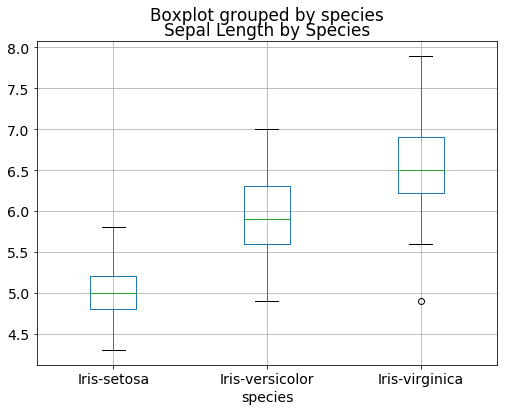

In [45]:
ax = iris.boxplot(column='sepal_length', by='species', figsize=(8,6))
ax.set_title('Sepal Length by Species');

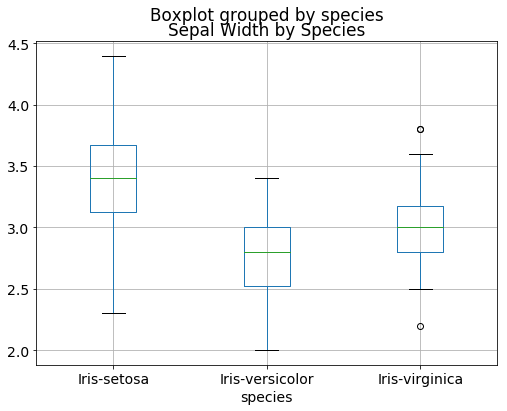

In [41]:
ax = iris.boxplot(column='sepal_width', by='species', figsize=(8,6))
ax.set_title('Sepal Width by Species');

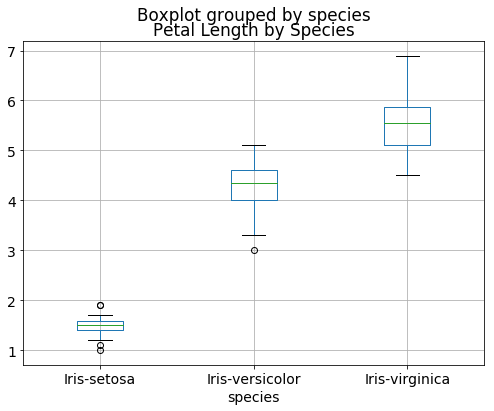

In [42]:
ax = iris.boxplot(column='petal_length', by='species', figsize=(8,6))
ax.set_title('Petal Length by Species');

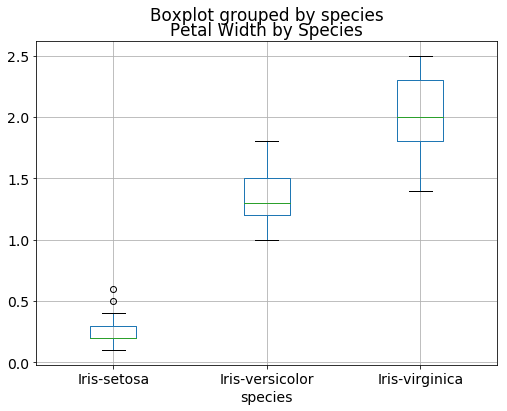

In [39]:
ax = iris.boxplot(column='petal_width', by='species', figsize=(8,6))
ax.set_title('Petal Width by Species');

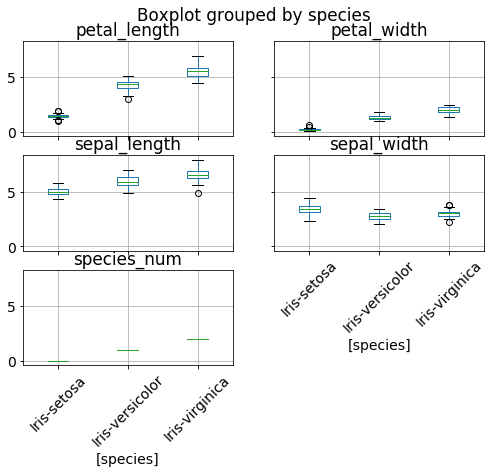

In [47]:
#all together in the same view.
ax = iris.boxplot(by='species', rot=45, figsize = (8,6));

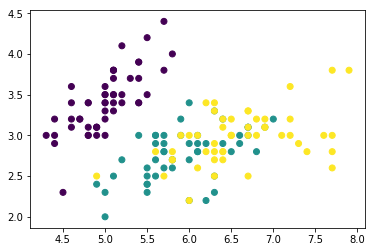

In [60]:
#ax = iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num')
fig, ax1 = plt.subplots()
ax.scatter(data=iris, x='petal_length', y='petal_width', c='species_num');
ax1.scatter(data=iris, x='sepal_length', y='sepal_width', c='species_num');

- Get the accuracy of a null model that simply predicts the most common species.

In [80]:
y = iris.loc[:, 'species_num']

frequencies = y.value_counts().sort_values(ascending=False)
total = frequencies.sum()
biggest_frequency = frequencies.iloc[0]

biggest_frequency / total

#the null model would only be 33% accurate

0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [84]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [95]:
#Print X_test to check standardization
X_test

array([[ 1.32821842,  0.10932865,  0.94818249,  1.17842072],
       [-1.77613181, -0.36162555, -1.32218499, -1.28491846],
       [ 0.70734837, -0.36162555,  0.32383143,  0.14122527],
       [ 1.32821842,  0.34480576,  1.11846005,  1.43771958],
       [-1.03108775,  1.28671417, -1.32218499, -1.28491846],
       [-0.41021771, -1.30353396,  0.15355387,  0.14122527],
       [ 0.21065234, -0.36162555,  0.43734981,  0.40052413],
       [ 1.0798704 , -1.30353396,  1.17521924,  0.78947242],
       [-1.27943577,  0.81575996, -1.03838905, -1.28491846],
       [ 0.08647833,  0.34480576,  0.60762737,  0.78947242],
       [ 2.32161049, -0.59710265,  1.68605192,  1.04877128],
       [ 0.58317436, -1.77448817,  0.38059062,  0.14122527],
       [ 0.33482635, -0.12614845,  0.66438655,  0.78947242],
       [-0.2860437 , -0.83257976,  0.26707225,  0.14122527],
       [ 1.0798704 ,  0.58028286,  1.11846005,  1.17842072],
       [-0.53439172,  1.99314548, -1.37894418, -1.0256196 ],
       [-1.15526176,  0.

In [98]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

print((metrics.accuracy_score(y_test, y_pred_class)))
print((metrics.accuracy_score(y_train, knn.predict(X_train))))

0.9473684210526315
0.9732142857142857


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In [ ]:
#The model performed much better on the training set (~97%) compared to the null model (33%). This tells me that the model has
#much lower bias and a higher variance compared to the null model since the null model output is constant.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

In [ ]:
#The model performed slightly better on the training set (97%) compared to the test set (95%). This tells me that the bias of 
#the model will keep on increasing as we add more test data points. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

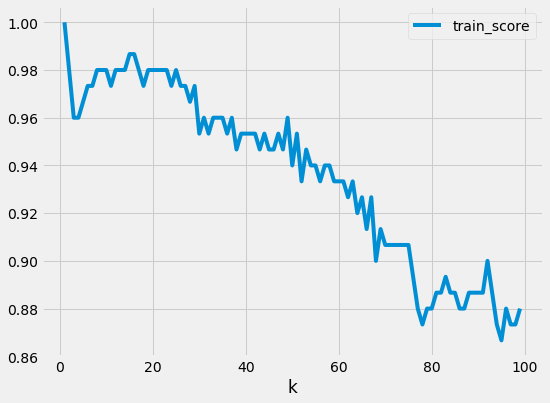

In [103]:
#Get train scores for values of k
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')
train_scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    train_scores.append([k, score])
scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])
ax = scores_df.plot(kind='line', x='k', y='train_score')

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

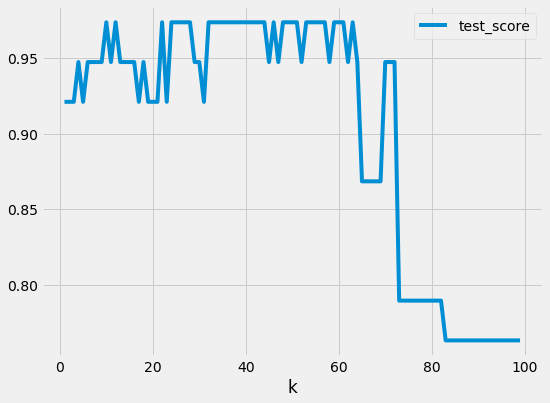

In [104]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
# /scrub/
test_scores = []

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=99, shuffle=True)
)

for k in range(1, 100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    test_scores.append(test_accuracy)
scores_df.loc[:, 'test_score'] = test_scores
ax = scores_df.plot(kind='line', x='k', y='test_score')

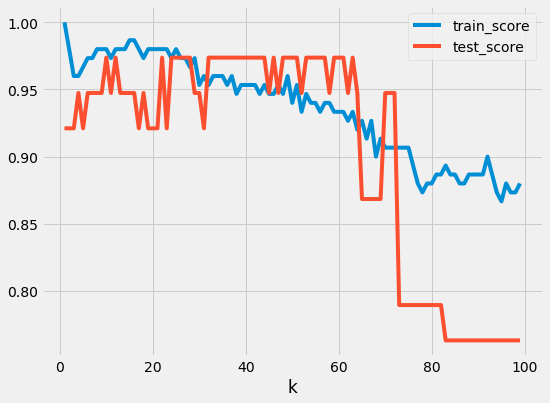

In [105]:
ax = scores_df.plot(kind='line', x='k', y='train_score')
scores_df.plot(kind='line', x='k', y='test_score', ax=ax);

In [110]:
scores_df.sort_values(['test_score','train_score'], ascending=False).head()
#k=10 should produce the best accuracy

,k,train_score,test_score
9,10,0.980000,0.973684
11,12,0.980000,0.973684
21,22,0.980000,0.973684
24,25,0.980000,0.973684
23,24,0.973333,0.973684


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
